In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from random import choices, sample
from gensim.models import Word2Vec
import gc
pd.set_option('display.float_format',lambda x : '%.2f' % x)
from math import log10

In [2]:
with open('./NN_result/lt_df_NN_rank_122days.pkl', 'rb') as file:
    lt_df_NN_rank = pickle.load(file)

In [3]:
full_table = pd.concat(lt_df_NN_rank[15:15+54], ignore_index=True)

In [4]:
full_table

,target,next,rank,NN_rank
0,102ca9ccb86811e9b0f5acde48001122,e360cdcab86611e987efacde48001122,10.00,32
1,e360cdcab86611e987efacde48001122,06fb62c2b86711e9867dacde48001122,4.00,13
2,baaadc26b86711e9b9cbacde48001122,e353a26cb86611e992e5acde48001122,60.00,29
3,e353a26cb86611e992e5acde48001122,e35fafb4b86611e99d1dacde48001122,59.00,17
4,e336d7e2b86611e9a7f7acde48001122,e3875b18b86611e9bab5acde48001122,40.00,34
...,...,...,...,...
2176234,17a1fbf4b86711e98eb1acde48001122,1794c89eb86711e99a2eacde48001122,3.00,1
2176235,1794c89eb86711e99a2eacde48001122,5ba15890b86711e9ab99acde48001122,1.00,1
2176236,e33344e8b86611e98696acde48001122,e36092b0b86611e98917acde48001122,6.00,8
2176237,e34457bab86611e9a371acde48001122,17aee940b86711e9a801acde48001122,7.00,12


In [5]:
full_table.describe()

,rank,NN_rank
count,2176239.00,2176239.00
mean,20.54,20.81
std,24.51,22.82
min,1.00,1.00
25%,3.00,4.00
50%,9.00,11.00
75%,30.00,31.00
max,99.00,99.00


In [6]:
table_grby = full_table.groupby(['target'])
pd.DataFrame(table_grby.size())

,0
target,
008f3dccb86811e9b6c1acde48001122,5
008f3e76b86811e98317acde48001122,11
008f42e8b86811e9bd2aacde48001122,3
008f4862b86811e9a907acde48001122,2
008f49cab86811e98f31acde48001122,9
...,...
f94557e6b86b11e98019acde48001122,1
f9456918b86b11e9b213acde48001122,1
f945b88ab86b11e99cacacde48001122,3


In [7]:
df_table  = pd.merge(full_table, pd.DataFrame(table_grby.size()), on=['target'], how='left')

In [8]:
df_table.rename(columns = {0:'occur'}, inplace=True)

In [9]:
df_table

,target,next,rank,NN_rank,occur
0,102ca9ccb86811e9b0f5acde48001122,e360cdcab86611e987efacde48001122,10.00,32,45
1,e360cdcab86611e987efacde48001122,06fb62c2b86711e9867dacde48001122,4.00,13,134
2,baaadc26b86711e9b9cbacde48001122,e353a26cb86611e992e5acde48001122,60.00,29,48
3,e353a26cb86611e992e5acde48001122,e35fafb4b86611e99d1dacde48001122,59.00,17,38
4,e336d7e2b86611e9a7f7acde48001122,e3875b18b86611e9bab5acde48001122,40.00,34,9
...,...,...,...,...,...
2176234,17a1fbf4b86711e98eb1acde48001122,1794c89eb86711e99a2eacde48001122,3.00,1,7
2176235,1794c89eb86711e99a2eacde48001122,5ba15890b86711e9ab99acde48001122,1.00,1,10
2176236,e33344e8b86611e98696acde48001122,e36092b0b86611e98917acde48001122,6.00,8,442
2176237,e34457bab86611e9a371acde48001122,17aee940b86711e9a801acde48001122,7.00,12,20


In [10]:
df_table.drop_duplicates(inplace=True, ignore_index=True)
df_table

,target,next,rank,NN_rank,occur
0,102ca9ccb86811e9b0f5acde48001122,e360cdcab86611e987efacde48001122,10.00,32,45
1,e360cdcab86611e987efacde48001122,06fb62c2b86711e9867dacde48001122,4.00,13,134
2,baaadc26b86711e9b9cbacde48001122,e353a26cb86611e992e5acde48001122,60.00,29,48
3,e353a26cb86611e992e5acde48001122,e35fafb4b86611e99d1dacde48001122,59.00,17,38
4,e336d7e2b86611e9a7f7acde48001122,e3875b18b86611e9bab5acde48001122,40.00,34,9
...,...,...,...,...,...
1047755,00f98b8cb86811e9a910acde48001122,070fc564b86711e9ae11acde48001122,2.00,2,6
1047756,e38db69eb86611e98961acde48001122,5be20002b86711e9a4d9acde48001122,38.00,26,5
1047757,e3804e0cb86611e98011acde48001122,e32ad0b4b86611e9ac71acde48001122,65.00,1,14
1047758,5bdbb65cb86711e98b51acde48001122,071a408cb86711e98188acde48001122,6.00,3,5


In [11]:
df_table.describe()

,rank,NN_rank,occur
count,1047760.00,1047760.00,1047760.00
mean,25.09,25.47,30.60
std,26.33,24.70,88.79
min,1.00,1.00,1.00
25%,4.00,5.00,4.00
50%,14.00,17.00,11.00
75%,39.00,39.00,28.00
max,99.00,99.00,4931.00


In [12]:
df_table.groupby('occur').mean().describe()

,rank,NN_rank
count,496.00,496.00
mean,33.32,30.90
std,5.08,4.44
min,1.00,17.00
25%,30.73,28.09
50%,33.47,30.33
75%,36.37,33.34
max,47.65,45.98


In [13]:
# df_table.groupby('occur').mean().to_excel('result_-107days_v3.xlsx')

In [14]:
# df_table.groupby('occur').mean().to_csv('result_-107days.csv')

In [15]:
# df_table.groupby('occur').mean().plot(figsize=(20,10))[:100]

---

In [16]:
df_table['label'] = df_table.apply(lambda df: df['rank'] > df['NN_rank'], axis=1)

In [17]:
# df_table['X_1'] = df_table.apply(lambda df: 1-df['rank']/100, axis=1)

In [18]:
df_table

,target,next,rank,NN_rank,occur,label
0,102ca9ccb86811e9b0f5acde48001122,e360cdcab86611e987efacde48001122,10.00,32,45,False
1,e360cdcab86611e987efacde48001122,06fb62c2b86711e9867dacde48001122,4.00,13,134,False
2,baaadc26b86711e9b9cbacde48001122,e353a26cb86611e992e5acde48001122,60.00,29,48,True
3,e353a26cb86611e992e5acde48001122,e35fafb4b86611e99d1dacde48001122,59.00,17,38,True
4,e336d7e2b86611e9a7f7acde48001122,e3875b18b86611e9bab5acde48001122,40.00,34,9,True
...,...,...,...,...,...,...
1047755,00f98b8cb86811e9a910acde48001122,070fc564b86711e9ae11acde48001122,2.00,2,6,False
1047756,e38db69eb86611e98961acde48001122,5be20002b86711e9a4d9acde48001122,38.00,26,5,True
1047757,e3804e0cb86611e98011acde48001122,e32ad0b4b86611e9ac71acde48001122,65.00,1,14,True
1047758,5bdbb65cb86711e98b51acde48001122,071a408cb86711e98188acde48001122,6.00,3,5,True


In [19]:
df_table.describe()

,rank,NN_rank,occur
count,1047760.00,1047760.00,1047760.00
mean,25.09,25.47,30.60
std,26.33,24.70,88.79
min,1.00,1.00,1.00
25%,4.00,5.00,4.00
50%,14.00,17.00,11.00
75%,39.00,39.00,28.00
max,99.00,99.00,4931.00


In [20]:
df_table.nunique()

target     252463
next       259278
rank           99
NN_rank        99
occur         496
label           2
dtype: int64

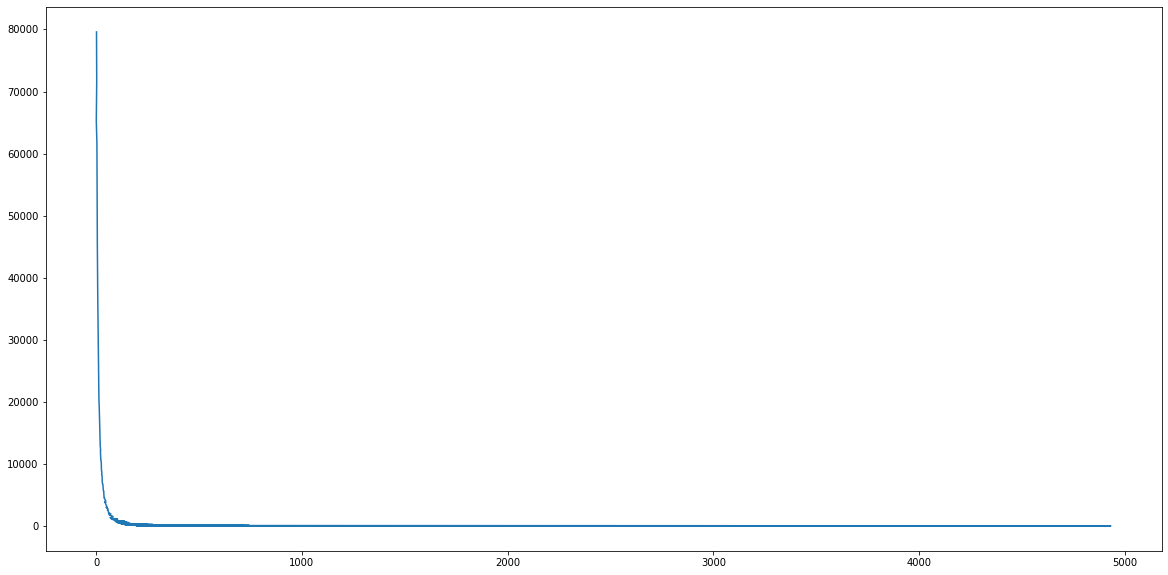

In [21]:
df_table['occur'].value_counts().plot(figsize=(20,10))

In [22]:
df_table['occur'].value_counts()

2       79606
3       71666
1       65229
4       61631
5       52797
        ...  
308        20
421        19
356        16
469        16
1334        1
Name: occur, Length: 496, dtype: int64

In [23]:
max_occur = max(df_table['occur'])
df_table['occur'].value_counts().apply(lambda x : log10(x)/log10(max_occur))

2      1.33
3      1.31
1      1.30
4      1.30
5      1.28
       ... 
308    0.35
421    0.35
356    0.33
469    0.33
1334   0.00
Name: occur, Length: 496, dtype: float64

In [24]:
pd.set_option('display.max_rows', 250)
max_occur = max(df_table['occur'])
df_occur = pd.DataFrame({'counts':df_table['occur'].value_counts(), 'log10':df_table['occur'].value_counts().apply(lambda x : log10(x)/log10(max_occur))}).reset_index()
df_occur.rename(columns = {'index':'occur'}, inplace=True)
max_log10 = max(df_occur['log10'])
df_occur['log10R'] = df_occur['log10'].apply(lambda x: max_log10-x)

In [25]:
from sklearn import preprocessing
Min_Max_Scaler = preprocessing.MinMaxScaler( feature_range=(0,1) ) # 設定縮放的區間上下限
MinMax_Data = Min_Max_Scaler.fit_transform( df_occur['log10R'].to_numpy().reshape(-1, 1) ) # Data 為原始資料

In [26]:
df_occur['log10R_MinMax'] = pd.DataFrame(MinMax_Data)

In [27]:
pd.set_option('display.float_format',lambda x : '%.2f' % x)
df_occur

,occur,counts,log10,log10R,log10R_MinMax
0,2,79606,1.33,0.00,0.00
1,3,71666,1.31,0.01,0.01
2,1,65229,1.30,0.02,0.02
3,4,61631,1.30,0.03,0.02
4,5,52797,1.28,0.05,0.04
...,...,...,...,...,...
491,308,20,0.35,0.97,0.73
492,421,19,0.35,0.98,0.74
493,356,16,0.33,1.00,0.75
494,469,16,0.33,1.00,0.75


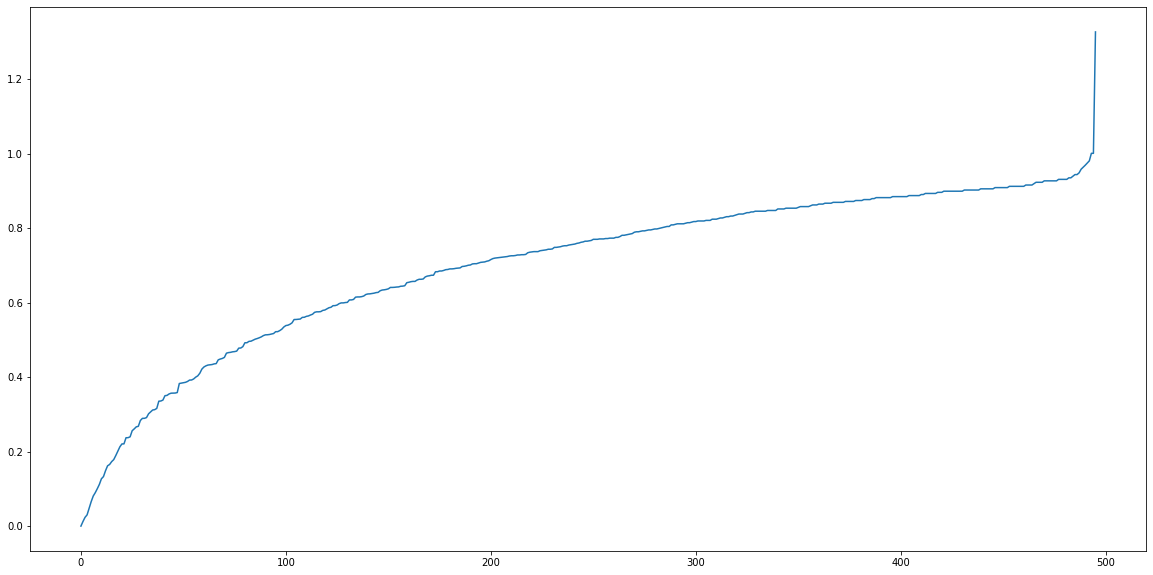

In [28]:
df_occur['log10R'].plot(figsize=(20,10))

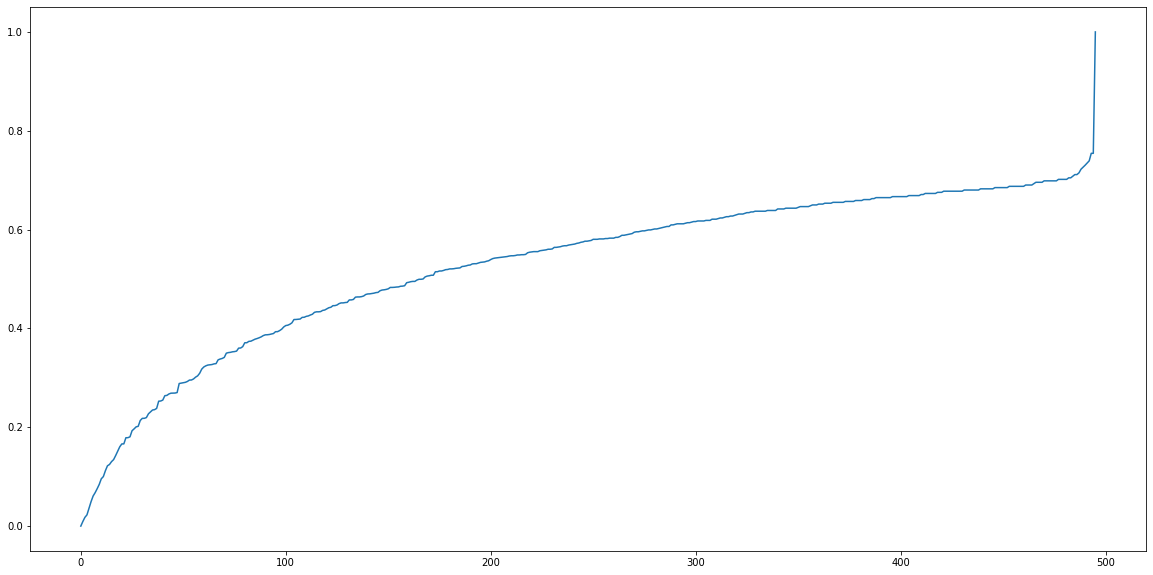

In [29]:
df_occur['log10R_MinMax'].plot(figsize=(20,10))

---

In [30]:
df_occur.drop(['counts', 'log10', 'log10R'], axis=1, inplace=True)
df_occur

,occur,log10R_MinMax
0,2,0.00
1,3,0.01
2,1,0.02
3,4,0.02
4,5,0.04
...,...,...
491,308,0.73
492,421,0.74
493,356,0.75
494,469,0.75


In [31]:
df_table_ok = df_table.join(df_occur.set_index('occur'), on='occur').rename(columns = {'log10R_MinMax':'X_2'})

In [32]:
df_table_ok

,target,next,rank,NN_rank,occur,label,X_2
0,102ca9ccb86811e9b0f5acde48001122,e360cdcab86611e987efacde48001122,10.00,32,45,False,0.26
1,e360cdcab86611e987efacde48001122,06fb62c2b86711e9867dacde48001122,4.00,13,134,False,0.48
2,baaadc26b86711e9b9cbacde48001122,e353a26cb86611e992e5acde48001122,60.00,29,48,True,0.27
3,e353a26cb86611e992e5acde48001122,e35fafb4b86611e99d1dacde48001122,59.00,17,38,True,0.24
4,e336d7e2b86611e9a7f7acde48001122,e3875b18b86611e9bab5acde48001122,40.00,34,9,True,0.08
...,...,...,...,...,...,...,...
1047755,00f98b8cb86811e9a910acde48001122,070fc564b86711e9ae11acde48001122,2.00,2,6,False,0.05
1047756,e38db69eb86611e98961acde48001122,5be20002b86711e9a4d9acde48001122,38.00,26,5,True,0.04
1047757,e3804e0cb86611e98011acde48001122,e32ad0b4b86611e9ac71acde48001122,65.00,1,14,True,0.12
1047758,5bdbb65cb86711e98b51acde48001122,071a408cb86711e98188acde48001122,6.00,3,5,True,0.04


In [33]:
#將資料分成訓練組及測試組
from sklearn.model_selection import train_test_split

X = df_table_ok.loc[:,['X_2']]
y = df_table_ok['label']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [34]:
#使用決策樹演算法
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [35]:
#評估決策樹模型好壞
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.56      0.94      0.70    175572
        True       0.50      0.08      0.14    138756

    accuracy                           0.56    314328
   macro avg       0.53      0.51      0.42    314328
weighted avg       0.54      0.56      0.45    314328



In [36]:
print(confusion_matrix(y_test,predictions))

[[164859  10713]
 [127899  10857]]


---

In [37]:
#使用隨機森林與決策樹做比較
from sklearn.ensemble import RandomForestClassifier

#n_estimator代表要使用多少CART樹（CART樹為使用GINI算法的決策樹）
rfc = RandomForestClassifier(n_estimators=100)

#從訓練組資料中建立隨機森林模型
rfc.fit(X_train,y_train)

rfc_pred = rfc.predict(X_test)

In [38]:
#利用classification report來看precision、recall、f1-score、support
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

       False       0.56      0.94      0.70    175572
        True       0.50      0.08      0.14    138756

    accuracy                           0.56    314328
   macro avg       0.53      0.51      0.42    314328
weighted avg       0.54      0.56      0.45    314328



In [39]:
#利用confusion matrix來看實際及預測的差異
print(confusion_matrix(y_test,rfc_pred))

[[164372  11200]
 [127415  11341]]


---

In [40]:
full_table = pd.concat(lt_df_NN_rank[15:], ignore_index=True)

In [41]:
table_grby = full_table.groupby(['target'])
# pd.DataFrame(table_grby.size())

In [42]:
df_table  = pd.merge(pd.DataFrame(table_grby.size()), full_table, on=['target'], how='left')

In [43]:
df_table.rename(columns = {0:'occur'}, inplace=True)

In [44]:
df_table.drop_duplicates(inplace=True, ignore_index=True)
# df_table

In [45]:
df_table['label'] = df_table.apply(lambda df: df['rank'] > df['NN_rank'], axis=1)

In [46]:
# df_table['X_1'] = df_table.apply(lambda df: 1-df['rank']/100, axis=1)

In [47]:
# pd.set_option('display.max_rows', 250)
max_occur = max(df_table['occur'])
df_occur = pd.DataFrame({'counts':df_table['occur'].value_counts(), 'log10':df_table['occur'].value_counts().apply(lambda x : log10(x)/log10(max_occur))}).reset_index()
df_occur.rename(columns = {'index':'occur'}, inplace=True)
max_log10 = max(df_occur['log10'])
df_occur['log10R'] = df_occur['log10'].apply(lambda x: max_log10-x)

In [48]:
from sklearn import preprocessing
Min_Max_Scaler = preprocessing.MinMaxScaler( feature_range=(0,1) ) # 設定縮放的區間上下限
MinMax_Data = Min_Max_Scaler.fit_transform( df_occur['log10R'].to_numpy().reshape(-1, 1) ) # Data 為原始資料

In [49]:
df_occur['log10R_MinMax'] = pd.DataFrame(MinMax_Data)

In [50]:
df_occur.drop(['counts', 'log10', 'log10R'], axis=1, inplace=True)
# df_occur

In [51]:
df_table_ok = df_table.join(df_occur.set_index('occur'), on='occur').rename(columns = {'log10R_MinMax':'X_2'})

In [52]:
# 1047760 -54days
df_table_testday = pd.DataFrame(df_table_ok[1047760:])
df_table_testday

,target,occur,next,rank,NN_rank,label,X_2
1047760,e32daaeeb86611e982d0acde48001122,298,e346187ab86611e9af25acde48001122,33.00,14,True,0.72
1047761,e32daaeeb86611e982d0acde48001122,298,e3689ae6b86611e9891dacde48001122,45.00,48,False,0.72
1047762,e32daaeeb86611e982d0acde48001122,298,e3332654b86611e993f1acde48001122,80.00,30,True,0.72
1047763,e32daaeeb86611e982d0acde48001122,298,e3534b14b86611e98ecbacde48001122,18.00,19,False,0.72
1047764,e32daaeeb86611e982d0acde48001122,298,e32ae658b86611e98a1facde48001122,90.00,18,True,0.72
...,...,...,...,...,...,...,...
1595320,fbd89552b86d11e9bb6cacde48001122,2,1776586eb86711e999d4acde48001122,22.00,1,True,0.00
1595321,fbd95d02b86d11e9b61facde48001122,1,b8b2a0f4b86c11e9931aacde48001122,1.00,2,False,0.04
1595322,fbd99254b86d11e98d74acde48001122,4,78661a8cb86811e99421acde48001122,2.00,25,False,0.01
1595323,fbd99254b86d11e98d74acde48001122,4,e492f44cb86a11e9be3dacde48001122,1.00,7,False,0.01


In [53]:
#將資料分成訓練組及測試組
from sklearn.model_selection import train_test_split

X = df_table_testday.loc[:,['X_2']]
y = df_table_testday['label']

---

In [54]:
#評估決策樹模型好壞
predictions = dtree.predict(X)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y,predictions))

              precision    recall  f1-score   support

       False       0.54      0.88      0.67    291597
        True       0.50      0.14      0.22    255968

    accuracy                           0.53    547565
   macro avg       0.52      0.51      0.44    547565
weighted avg       0.52      0.53      0.46    547565



In [55]:
print(confusion_matrix(y,predictions))

[[255485  36112]
 [219556  36412]]


---

In [69]:
rfc_pred = rfc.predict(X)
#利用classification report來看precision、recall、f1-score、support
print(classification_report(y,rfc_pred))

              precision    recall  f1-score   support

       False       0.73      0.72      0.72    291597
        True       0.68      0.69      0.69    255968

    accuracy                           0.71    547565
   macro avg       0.71      0.71      0.71    547565
weighted avg       0.71      0.71      0.71    547565



In [70]:
#利用confusion matrix來看實際及預測的差異
print(confusion_matrix(y,rfc_pred))

[[208883  82714]
 [ 78082 177886]]


---

In [56]:
df_table_testday['pred'] = predictions

In [57]:
df_table_testday['switch'] = df_table_testday.apply(lambda df: df['NN_rank'] if df['pred'] else df['rank'], axis=1)

In [58]:
df_table_testday

,target,occur,next,rank,NN_rank,label,X_2,pred,switch
1047760,e32daaeeb86611e982d0acde48001122,298,e346187ab86611e9af25acde48001122,33.00,14,True,0.72,False,33.00
1047761,e32daaeeb86611e982d0acde48001122,298,e3689ae6b86611e9891dacde48001122,45.00,48,False,0.72,False,45.00
1047762,e32daaeeb86611e982d0acde48001122,298,e3332654b86611e993f1acde48001122,80.00,30,True,0.72,False,80.00
1047763,e32daaeeb86611e982d0acde48001122,298,e3534b14b86611e98ecbacde48001122,18.00,19,False,0.72,False,18.00
1047764,e32daaeeb86611e982d0acde48001122,298,e32ae658b86611e98a1facde48001122,90.00,18,True,0.72,False,90.00
...,...,...,...,...,...,...,...,...,...
1595320,fbd89552b86d11e9bb6cacde48001122,2,1776586eb86711e999d4acde48001122,22.00,1,True,0.00,False,22.00
1595321,fbd95d02b86d11e9b61facde48001122,1,b8b2a0f4b86c11e9931aacde48001122,1.00,2,False,0.04,False,1.00
1595322,fbd99254b86d11e98d74acde48001122,4,78661a8cb86811e99421acde48001122,2.00,25,False,0.01,False,2.00
1595323,fbd99254b86d11e98d74acde48001122,4,e492f44cb86a11e9be3dacde48001122,1.00,7,False,0.01,False,1.00


In [59]:
df_table_testday.describe()

,occur,rank,NN_rank,X_2,switch
count,547565.00,547565.00,547565.00,547565.00,547565.00
mean,68.63,28.47,27.71,0.24,28.14
std,132.43,27.01,24.87,0.19,26.62
min,1.00,1.00,1.00,0.00,1.00
25%,12.00,6.00,7.00,0.09,6.00
50%,31.00,19.00,20.00,0.20,19.00
75%,72.00,45.00,43.00,0.34,44.00
max,4053.00,99.00,99.00,0.96,99.00
